In [3]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# prompt: upload file using this copy path "/content/Large_Sales_Data_2000.xlsx"

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "/content/Large_Sales_Data_2000.xlsx"  # Use the provided file path
try:
    sales_data = pd.read_excel(file_path)
    print("File loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    # Handle the error appropriately, e.g., exit or use a default dataset
    exit() # Stop execution if the file isn't found
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    exit() # Stop execution if another error occurs


# Now you can proceed with your data processing and modeling as before.
# Example (replace with your actual data processing)
# print(sales_data.head())

File loaded successfully!


In [5]:
# prompt: show top 5 rows of the data and load the data in df

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "/content/Large_Sales_Data_2000.xlsx"  # Use the provided file path
try:
    df = pd.read_excel(file_path)
    print("File loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    # Handle the error appropriately, e.g., exit or use a default dataset
    exit() # Stop execution if the file isn't found
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    exit() # Stop execution if another error occurs

File loaded successfully!
   Transaction ID        Date  Customer ID     Location Age Group  \
0            1001  2026-01-31          328  Los Angeles     46-55   
1            1002  2026-12-30          498       Austin       56+   
2            1003  2025-05-10          315       Denver     46-55   
3            1004  2026-07-18          215      Seattle     18-25   
4            1005  2026-02-04          477        Miami     18-25   

  Membership Type Product Category  Purchase Amount  Items Purchased  \
0          Bronze             Toys          206.392               11   
1        Platinum      Electronics           91.088                1   
2            Gold             Toys          162.253                2   
3          Silver             Food          178.030               11   
4          Silver    Home & Garden           69.740                2   

  Discount Applied  Satisfaction Score  Payment Method Returns     Month  \
0               No                   1            

Transaction ID        0
Date                  0
Customer ID           0
Location              0
Age Group             0
Membership Type       0
Product Category      0
Purchase Amount       0
Items Purchased       0
Discount Applied      0
Satisfaction Score    0
Payment Method        0
Returns               0
Month                 0
Day of Week           0
Average Item Value    0
dtype: int64
Duplicate Rows:
Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Location, Age Group, Membership Type, Product Category, Purchase Amount, Items Purchased, Discount Applied, Satisfaction Score, Payment Method, Returns, Month, Day of Week, Average Item Value]
Index: []


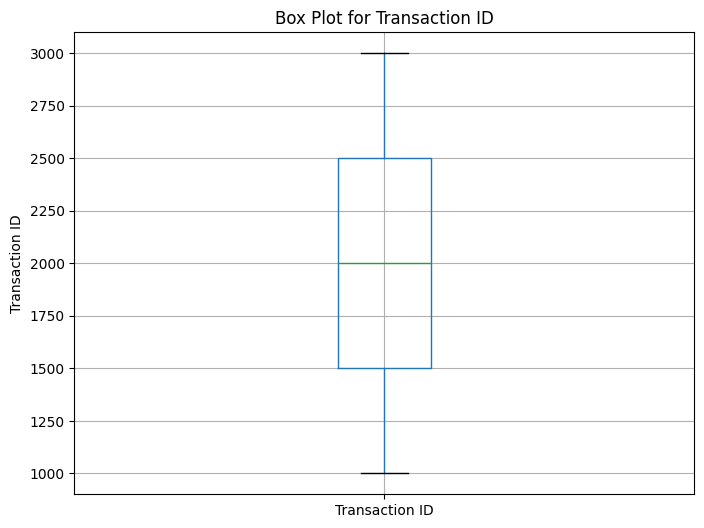

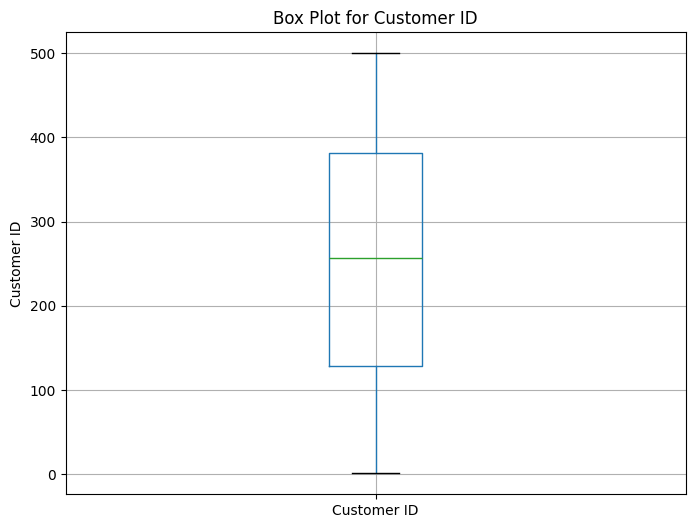

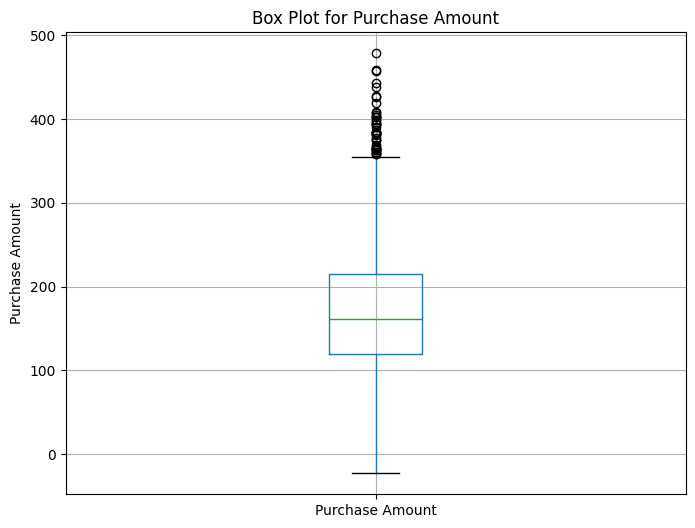

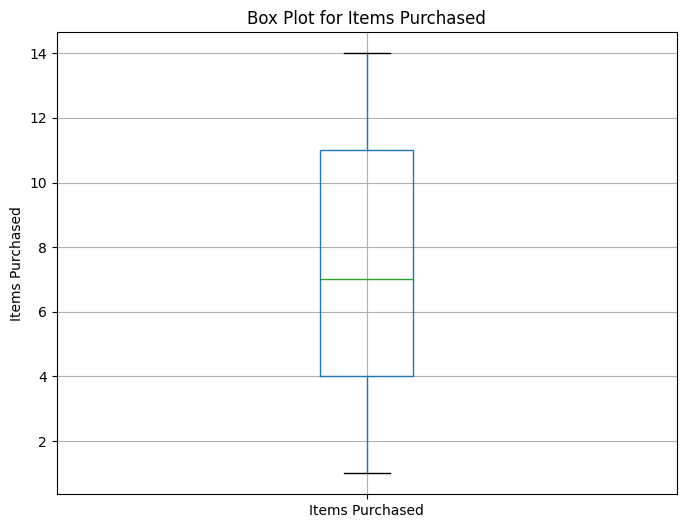

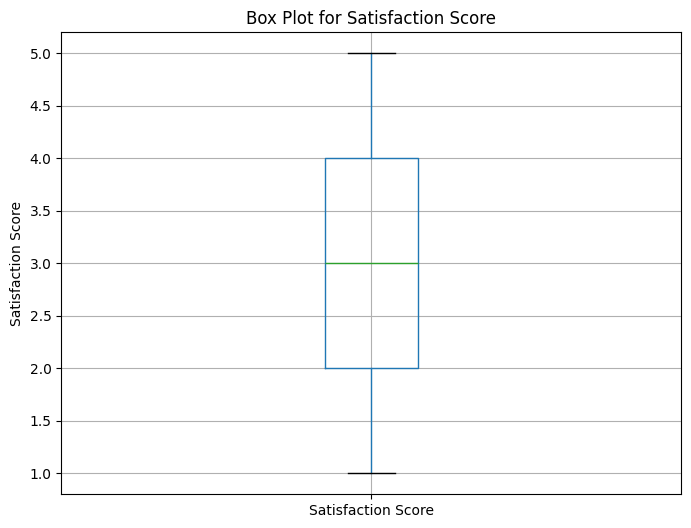

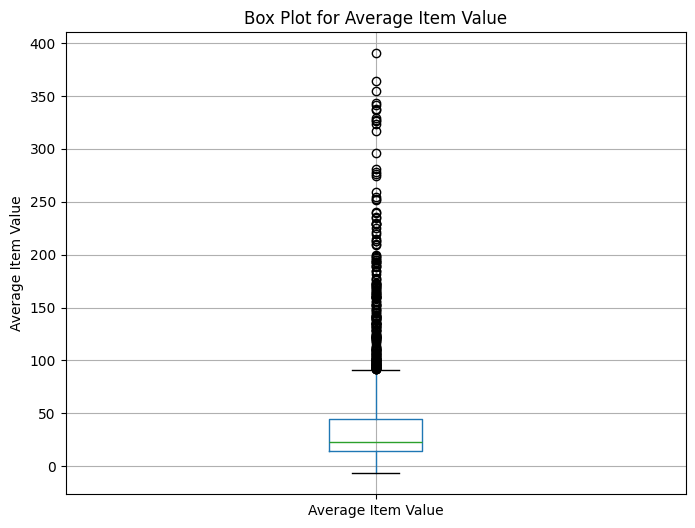

In [6]:
# prompt: check for null values, duplicate rows and outliers using box plot

import matplotlib.pyplot as plt
# Check for null values
print(df.isnull().sum())

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

# Check for outliers using box plots
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=[col])
    plt.title(f"Box Plot for {col}")
    plt.ylabel(col)
    plt.show()

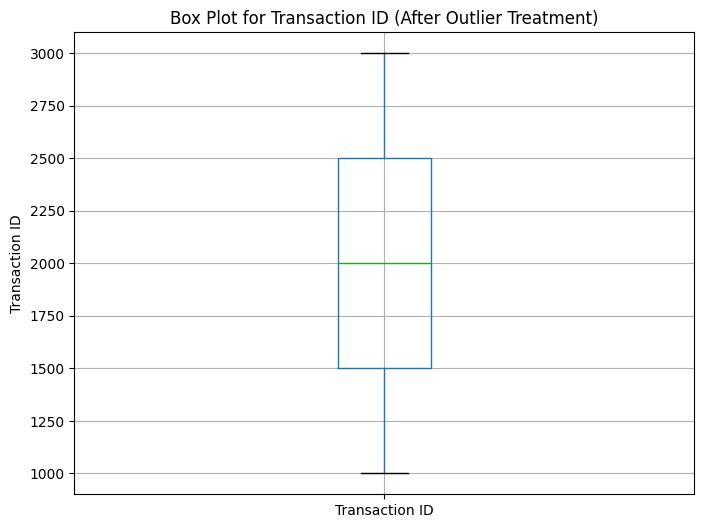

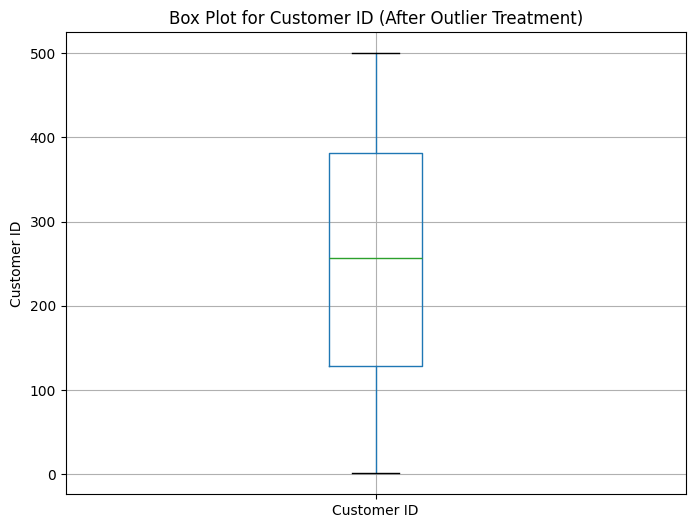

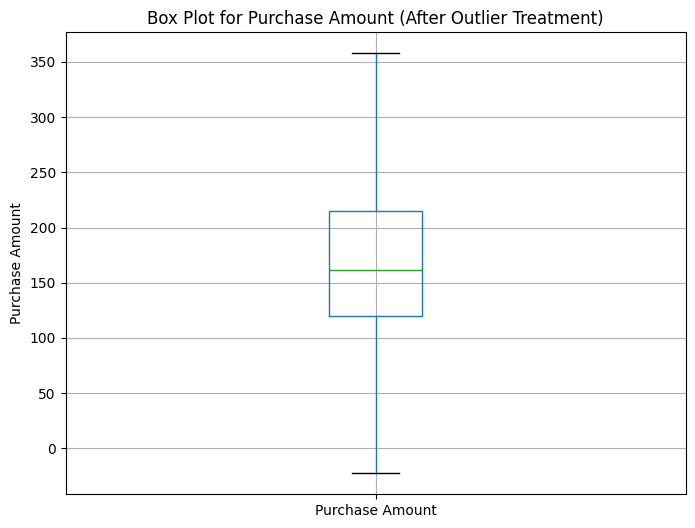

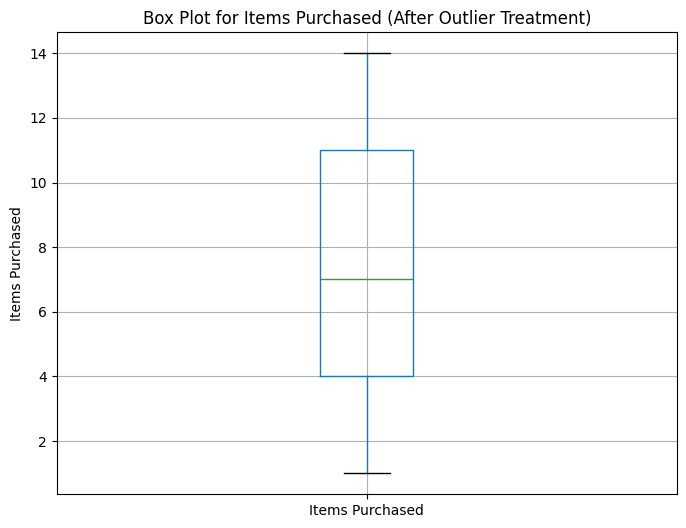

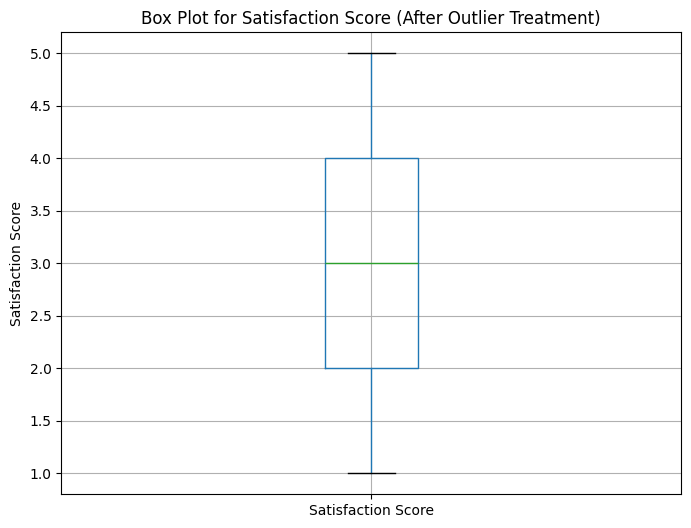

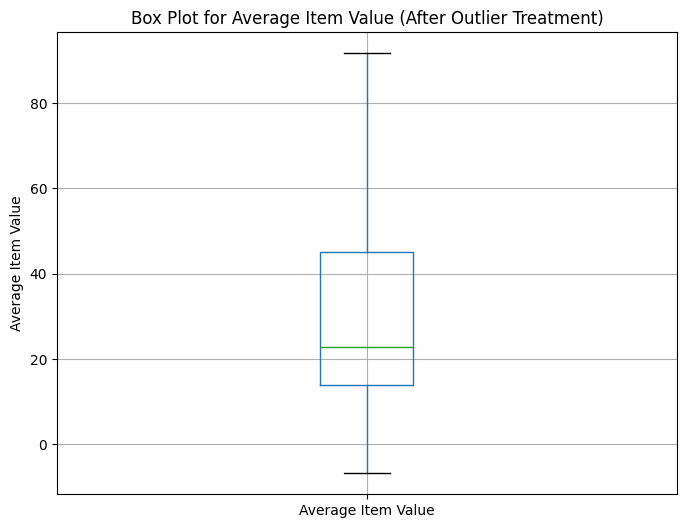

In [7]:
# prompt: treat outliers

# ... (Your existing code)

# Treat outliers using IQR method
def treat_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

for col in numerical_cols:
    df = treat_outliers_iqr(df, col)

# Verify outlier treatment (optional)
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=[col])
    plt.title(f"Box Plot for {col} (After Outlier Treatment)")
    plt.ylabel(col)
    plt.show()

In [8]:
# prompt: take the target variable Satisfaction Score

# Assuming 'Satisfaction Score' is the target variable
target_variable = df['Satisfaction Score']

# Now you can use 'target_variable' for your analysis or modeling.
# For example, to print the first few values:
print(target_variable.head())

0    1
1    5
2    5
3    2
4    4
Name: Satisfaction Score, dtype: int64


In [9]:
# prompt: divide the data into train and test split

# Split the data into training and testing sets
X = df.drop('Satisfaction Score', axis=1)  # Features (all columns except 'Satisfaction Score')
y = df['Satisfaction Score']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train 20% test

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1600, 15)
y_train shape: (1600,)
X_test shape: (400, 15)
y_test shape: (400,)


In [14]:
# prompt: remove the null values

# ... (Your existing code)

# Remove rows with null values
df = df.dropna()

# Check for null values again (to verify)
print(df.isnull().sum())

# ... (Rest of your code)

Transaction ID        0
Date                  0
Customer ID           0
Location              0
Age Group             0
Membership Type       0
Product Category      0
Purchase Amount       0
Items Purchased       0
Discount Applied      0
Satisfaction Score    0
Payment Method        0
Returns               0
Month                 0
Day of Week           0
Average Item Value    0
dtype: int64


In [24]:
# prompt: apply gradient boosting algorithm on this and give the metrics

# Assuming 'X_train', 'X_test', 'y_train', and 'y_test' are already defined

# Initialize and train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42) # You can adjust n_estimators
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 2.1292231147086658
R-squared (R2): -0.04150320499353888
